In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [20]:
#loading data
data_df = pd.read_csv(r'D:\HeartFailures\heart.csv')
# Mengganti nilai "M" dengan 1 dan "F" dengan 0 dalam kolom 'Sex'
data_df['Sex'] = data_df['Sex'].replace({'M': 1, 'F': 0}).astype(int)

# Mengganti nilai-nilai dalam kolom 'ChestPainType' menjadi integer
data_df['ChestPainType'] = data_df['ChestPainType'].replace({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3}).astype(int)

# Mengganti nilai-nilai dalam kolom 'RestingECG' menjadi integer
data_df['RestingECG'] = data_df['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2}).astype(int)

# Mengganti nilai-nilai dalam kolom 'ExerciseAngina' menjadi 0 dan 1
data_df['ExerciseAngina'] = data_df['ExerciseAngina'].replace({'N': 0, 'Y': 1}).astype(int)

# Mengganti nilai-nilai dalam kolom 'ST_Slope' menjadi integer
data_df['ST_Slope'] = data_df['ST_Slope'].replace({'Up': 1, 'Flat': 0, 'Down': -1}).astype(int)

# Mengganti nilai-nilai dalam kolom 'ST_Slope' menjadi integer
data_df['ST_Slope'] = data_df['ST_Slope'].replace({'Up': 1, 'Flat': 0, 'Down': -1}).astype(int)




data_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,0,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,0,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0


In [21]:
# Checking for any missing values across the dataset
data_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [22]:
# Checking for missing values
missing_values = data_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (if any)
# Example: Filling missing values with median
# data_df.fillna(data_df.median(), inplace=True)

# Checking for duplicates
duplicates = data_df.duplicated().sum()
print("Duplicate Rows: ", duplicates)

# Handling duplicates
data_df = data_df.drop_duplicates()

Missing Values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Duplicate Rows:  0


[Text(0, 0, '410')]

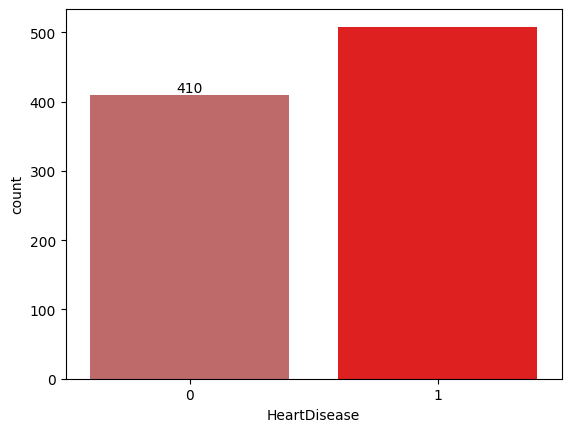

In [23]:
#Evaluating the target and finding out the potential skewness in the data
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= data_df["HeartDisease"], palette= cols)
ax.bar_label(ax.containers[0])

In [24]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,2.251634,0.931031,0.0,2.00,3.0,3.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


<Axes: >

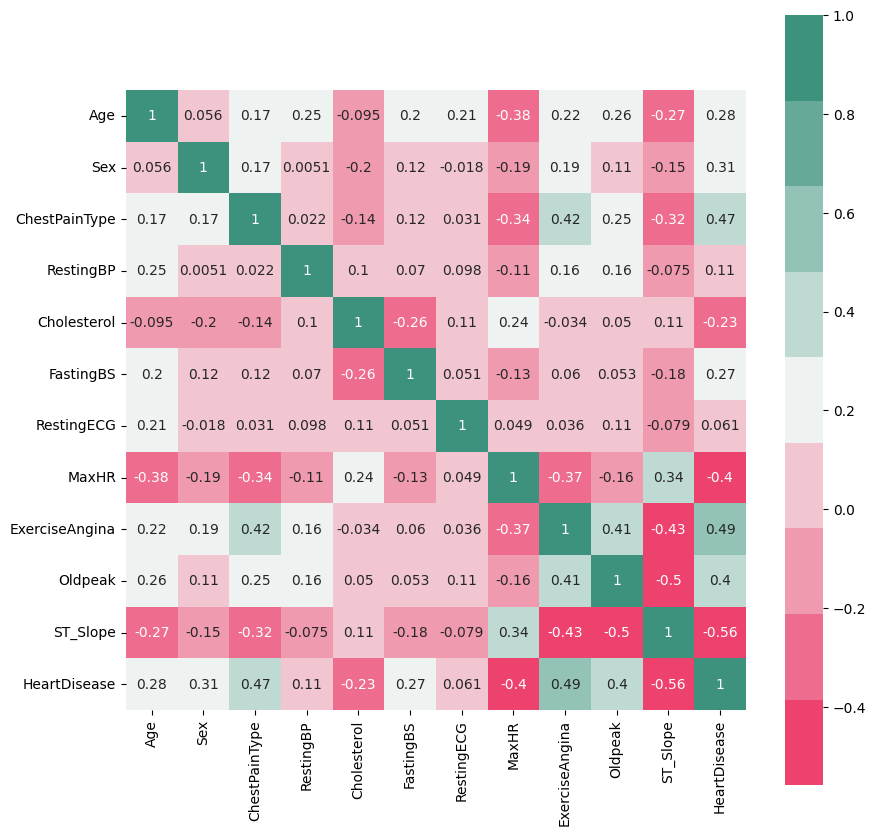

In [25]:
#Doing Bivariate Analysis by examaning a corelation matrix of all the features using heatmap
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = data_df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

Text(0.5, 1.0, 'Distribution Of Age')

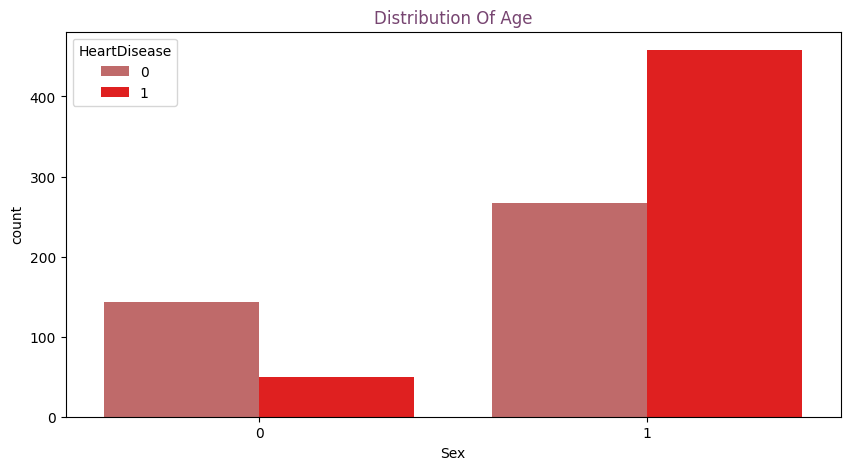

In [26]:
#Evauating age distribution as per the deaths happened
plt.figure(figsize=(10,5))
Days_of_week=sns.countplot(x=data_df['Sex'],data=data_df, hue ="HeartDisease",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

Text(0.5, 1.0, 'Distribution Of Age')

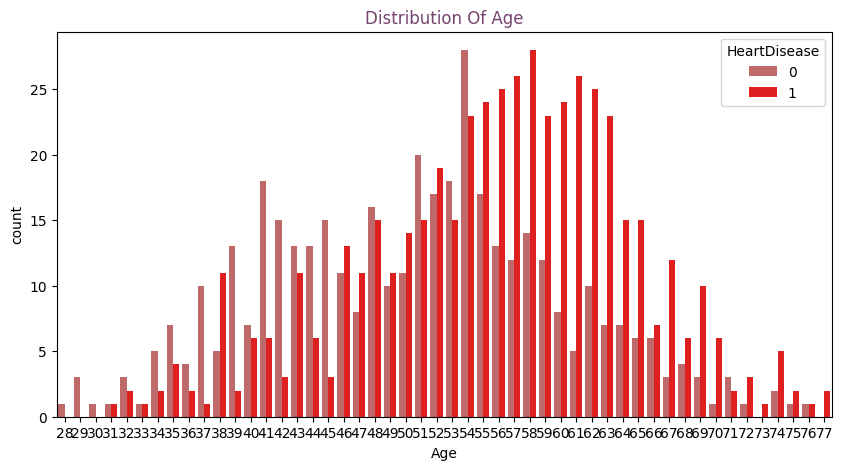

In [27]:
# Evaluating age distribution as per the deaths happened
plt.figure(figsize=(10,5))
Days_of_week=sns.countplot(x=data_df['Age'],data=data_df, hue ="HeartDisease",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")



In [28]:
# # Checking for potential outliers using Boxen and Swarm plots
# features = ["Age", "ChestPainType", "RestingBP", "Cholesterol", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"]
# for i in features:
#     plt.figure(figsize=(7,4))
#     sns.swarmplot(x=data_df["HeartDisease"], y=data_df[i], color="black", alpha=0.7)
#     sns.boxenplot(x=data_df["HeartDisease"], y=data_df[i], palette=cols)

# Checking for potential outliers using Boxen and Swarm plots
features = ["Age", "ChestPainType", "RestingBP", "Cholesterol", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"]

# Handling outliers (Example: Capping outliers to 1.5*IQR range)
indices_to_remove = []
for feature in features:
    Q1 = data_df[feature].quantile(0.25)
    Q3 = data_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = data_df[(data_df[feature] < lower_bound) | (data_df[feature] > upper_bound)].index
    indices_to_remove.extend(outlier_indices)

# Convert to set to remove duplicates
indices_to_remove = list(set(indices_to_remove))

In [29]:
    data_df_outliers_removed = data_df.drop(index=indices_to_remove)
    print(data_df_outliers_removed.count())

Age               663
Sex               663
ChestPainType     663
RestingBP         663
Cholesterol       663
FastingBS         663
RestingECG        663
MaxHR             663
ExerciseAngina    663
Oldpeak           663
ST_Slope          663
HeartDisease      663
dtype: int64


<Axes: xlabel='Cholesterol', ylabel='Age'>

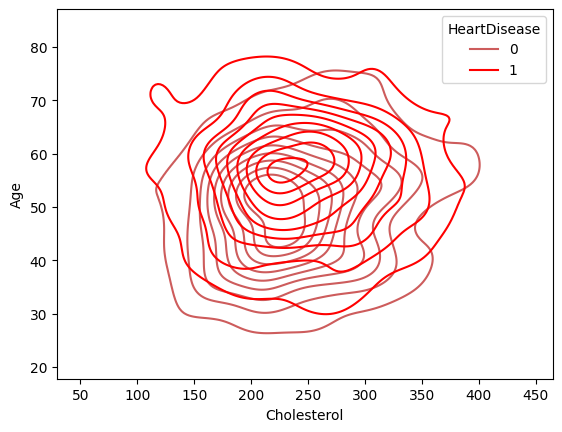

In [30]:
# Plotting "Kernel Density Estimation (kde plot)" of cholestrerol and age features -  both of which are significant ones.
sns.kdeplot(x=data_df_outliers_removed["Cholesterol"], y=data_df_outliers_removed["Age"], hue =data_df_outliers_removed["HeartDisease"], palette=cols)

<Axes: xlabel='ChestPainType', ylabel='MaxHR'>

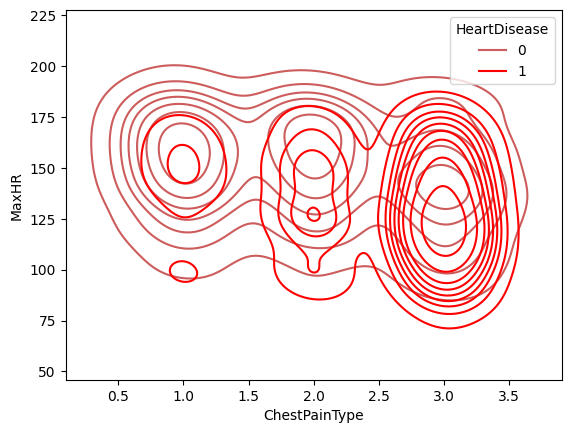

In [31]:
# Plotting "Kernel Density Estimation (kde plot)" of ChestPainType and age features -  both of which are significant ones.
sns.kdeplot(x=data_df_outliers_removed["ChestPainType"], y=data_df_outliers_removed["MaxHR"], hue =data_df_outliers_removed["HeartDisease"], palette=cols)

In [32]:
# Defining independent and dependent attributes in training and test sets
X=data_df_outliers_removed.drop(["HeartDisease"],axis=1)
y=data_df_outliers_removed["HeartDisease"]

# Menstandarisasi fitur

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Memisahkan data menjadi set pelatihan dan pengujian

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=25)

In [33]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,663.0,2.357759e-16,1.000755,-2.611963,-0.698917,0.045045,0.682727,2.595773
Sex,663.0,3.750980e-17,1.000755,-1.780396,0.561673,0.561673,0.561673,0.561673
ChestPainType,663.0,1.286050e-16,1.000755,-1.541414,-0.329128,0.883159,0.883159,0.883159
RestingBP,663.0,2.947198e-16,1.000755,-2.580785,-0.738813,-0.080966,0.576881,2.550423
Cholesterol,663.0,-2.652479e-16,1.000755,-3.040859,-0.650479,-0.101867,0.642677,3.209397
FastingBS,663.0,3.750980e-17,1.000755,-0.431331,-0.431331,-0.431331,-0.431331,2.318405
RestingECG,663.0,4.286834e-17,1.000755,-0.746059,-0.746059,-0.746059,0.454516,1.655091
MaxHR,663.0,-5.465713e-16,1.000755,-2.842062,-0.743426,-0.002731,0.820264,2.548552
ExerciseAngina,663.0,-1.607563e-17,1.000755,-0.798146,-0.798146,-0.798146,1.252904,1.252904
Oldpeak,663.0,4.286834e-17,1.000755,-0.958804,-0.855069,-0.440130,0.700953,2.879384


Akurasi Model SVM:  0.8693467336683417
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       107
           1       0.86      0.86      0.86        92

    accuracy                           0.87       199
   macro avg       0.87      0.87      0.87       199
weighted avg       0.87      0.87      0.87       199



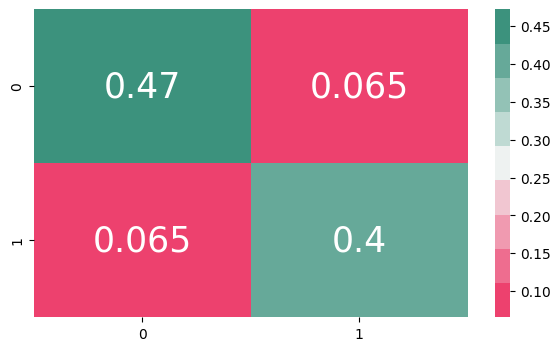

In [34]:
# Model SVM
model_svm = svm.SVC(probability=True)
model_svm.fit(X_train, y_train)

# Prediksi menggunakan model SVM
y_pred = model_svm.predict(X_test)
y_pred_proba = model_svm.predict_proba(X_test)[:, 1]

# Evaluasi model SVM
print("Akurasi Model SVM: ", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(7,4))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix / np.sum(cf_matrix), cmap=cmap1, annot=True, annot_kws={'size': 25})

plt.show()

In [35]:
import pickle
import joblib
# Save the model using pickle
with open('heart_failure.pkl', 'wb') as file:
    pickle.dump(model_svm, file)

# Save the model using joblib
joblib.dump(model_svm, 'heart_failure.joblib')

# Save the scaler using pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the scaler using joblib
joblib.dump(scaler, 'scaler.joblib')

print("Models and scaler have been saved.")

Models and scaler have been saved.


In [36]:
import ipywidgets as widgets
from IPython.display import display
# Define widgets for user input with ranges
age_widget = widgets.IntSlider(min=0, max=120, description='Age:')
sex_widget = widgets.Dropdown(options={'Male': 1, 'Female': 0}, description='Sex:')
chest_pain_widget = widgets.Dropdown(options={'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3}, description='Chest Pain:')
resting_bp_widget = widgets.IntSlider(min=50, max=200, description='Resting BP:')
cholesterol_widget = widgets.IntSlider(min=100, max=600, description='Cholesterol:')
fasting_bs_widget = widgets.Dropdown(options={'0': 0, '1': 1}, description='Fasting BS:')
resting_ecg_widget = widgets.Dropdown(options={'Normal': 0, 'ST': 1, 'LVH': 2}, description='Resting ECG:')
max_hr_widget = widgets.IntSlider(min=60, max=220, description='Max HR:')
exercise_angina_widget = widgets.Dropdown(options={'No': 0, 'Yes': 1}, description='Exercise Angina:')
oldpeak_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.1, description='Oldpeak:')
st_slope_widget = widgets.Dropdown(options={'Up': 1, 'Flat': 0, 'Down': -1}, description='ST Slope:')

input_widgets = widgets.VBox([
    age_widget,
    sex_widget,
    chest_pain_widget,
    resting_bp_widget,
    cholesterol_widget,
    fasting_bs_widget,
    resting_ecg_widget,
    max_hr_widget,
    exercise_angina_widget,
    oldpeak_widget,
    st_slope_widget
])

# Display widgets
display(input_widgets)

def make_prediction(_):
    # Get input values
    age = age_widget.value
    sex = sex_widget.value
    chest_pain = chest_pain_widget.value
    resting_bp = resting_bp_widget.value
    cholesterol = cholesterol_widget.value
    fasting_bs = fasting_bs_widget.value
    resting_ecg = resting_ecg_widget.value
    max_hr = max_hr_widget.value
    exercise_angina = exercise_angina_widget.value
    oldpeak = oldpeak_widget.value
    st_slope = st_slope_widget.value

    # Create the input data array
    input_data = np.array([[age, sex, chest_pain, resting_bp, cholesterol, fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope]])

    # Standardize input data
    input_data_scaled = scaler.transform(input_data)

    # Predict with the trained model
    prediction = model_svm.predict(input_data_scaled)
    prediction_proba = model_svm.predict_proba(input_data_scaled)

    print("Prediction:", "Heart Disease: Yes" if prediction[0] else "Heart Disease: No")
    print("Prediction Probability:", prediction_proba)

# Add a button to trigger prediction
predict_button = widgets.Button(description='Predict')
predict_button.on_click(make_prediction)

display(predict_button)

Button(description='Predict', style=ButtonStyle())

Prediction: Heart Disease: Yes
Prediction Probability: [[0.420973 0.579027]]
